In [9]:
#Import the necessary library files
%matplotlib inline 
import IPython.display as MusicDisplay
import sklearn
import librosa
import numpy
import scipy
import matplotlib.pyplot as plt
import librosa.display as LibDisplay
import mir_eval

In [10]:
# Convert the WAV file to floating point time series - monophony
# Sampling Frequency - Number of samples per second.
timeSeries, samplingRate = librosa.core.load('/Users/ashwin/GeorgeMasonUniversity/CS688/Generated/output_audio.wav', sr=22050, duration=30 )

In [11]:
# print(samplingRate)
frameCount = librosa.util.frame(y=timeSeries)
print(frameCount.shape)
print(timeSeries.shape)

(2048, 1288)
(661500,)


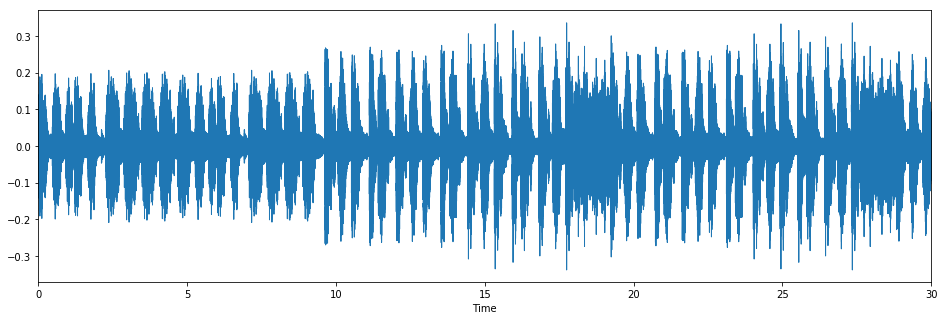

In [12]:
# Plot the time series of audio in wave form
plt.figure(figsize=(16, 5)) 
LibDisplay.waveplot(timeSeries, samplingRate)

In [13]:
# Detect onset sequences in the time series - get array of frames
#   delta - threshold offset for mean
#   wait - number of samples to wait after picking a peak
onsetFrames = librosa.onset.onset_detect(y=timeSeries, sr=samplingRate, hop_length=512)
# print(onsetFrames)

In [14]:
# Converts frame counts to time (seconds).
onsetTimes = librosa.core.frames_to_time(frames=onsetFrames, sr=samplingRate)
# print(onsetTimes)

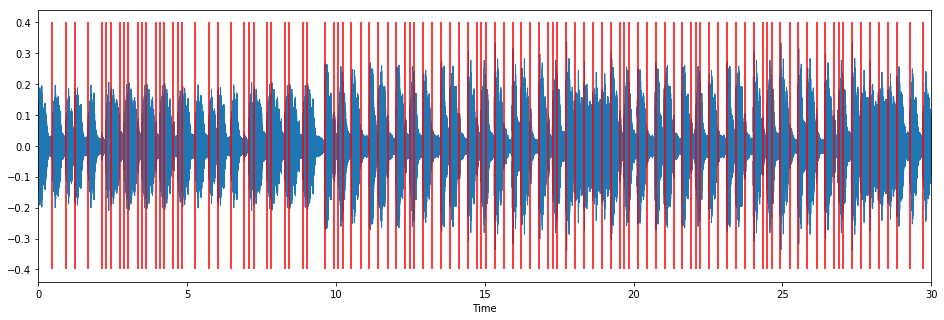

In [15]:
plt.figure(figsize=(16, 5)) 
LibDisplay.waveplot(timeSeries, samplingRate)
plt.vlines(onsetTimes, ymin=-0.4, ymax=0.4, color='r')

In [16]:
# Converts frame indices to audio sample indices.
onsetSamples = librosa.core.frames_to_samples(frames=onsetFrames)
print(onsetSamples)

[ 10240  20480  27136  36864  47104  50176  53760  60416  63488  66560
  73728  76800  79872  87040  90112  93184  99840 103424 106496 116224
 126464 133120 142848 152576 156160 159744 169472 172544 182784 185856
 196096 199168 211968 219136 222208 225792 231936 239104 245248 251904
 259072 265216 271872 275456 278528 285184 291840 297984 304640 311808
 317952 325120 328192 331264 337920 345088 351232 357888 364544 371200
 377856 380928 384512 390656 397824 404480 410624 417792 423936 430592
 434176 437248 443904 450560 457216 463872 470528 476672 483840 486912
 489984 496640 503808 509952 516608 523264 529920 536576 539648 543232
 549376 556544 562688 569344 576512 582656 589312 592896 595968 602624
 609280 615936 622592 629248 635904 645632 655360]


In [17]:
## FEATURES - ANALYSING AND PLOTTING FEATURES

72345


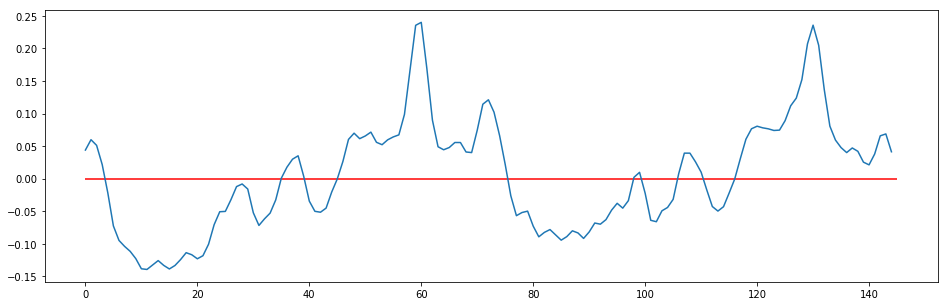

In [18]:
# Zero Crossing Rate
#   The number of times the signal crosses the horizontal axis.
frame1 = 320000
frame2 = 320145
plt.figure(figsize=(16, 5))
plt.plot(timeSeries[frame1:frame2])
plt.hlines(0, 0, 145, color='r')

# Total zero crossing count
zeroCrossCount = librosa.core.zero_crossings(timeSeries).sum()
print(zeroCrossCount)

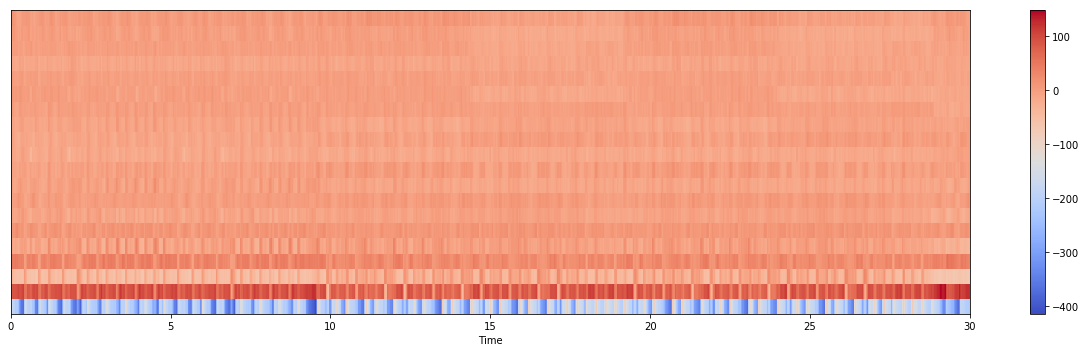

In [19]:
# Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=timeSeries, sr=samplingRate, n_mfcc=20)

# Plot MFCC
plt.figure(figsize=(17, 5))
LibDisplay.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.tight_layout()

In [20]:
# Root Mean Square Energy (RSME)
frame_length=2048
hop_length=512
rmse = librosa.feature.rmse(y=timeSeries, frame_length=frame_length, hop_length=hop_length)

print(rmse.shape)
rmse=rmse[0]

(1, 1292)


In [21]:
# Signal Energy
energy = numpy.array([
    sum(abs(timeSeries[i:i+frame_length]**2)) 
    for i in range(0, len(timeSeries), hop_length)
])

print(energy.shape)

(1292,)


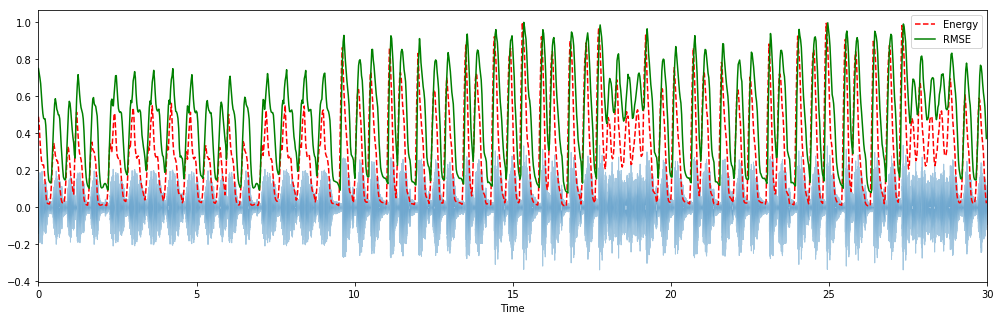

In [23]:
# Plot Signal Energy and RMSE.
frameCount = range(len(energy))
t = librosa.core.frames_to_time(frameCount, sr=samplingRate, hop_length=hop_length)

plt.figure(figsize=(17, 5))
LibDisplay.waveplot(timeSeries, sr=samplingRate, alpha=0.4)
plt.plot(t, energy/energy.max(), 'r--')
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='g')
plt.legend(('Energy', 'RMSE'))

In [24]:
## FEATURE EXTRACTION - COMPUTE 2 FEATURES

In [25]:
def LearnFeatures(samples):
    firstFeature = librosa.core.zero_crossings(samples).sum()
    secondFeature = scipy.linalg.norm(samples)
    return [firstFeature, secondFeature]

In [26]:
# Features that can be used for plotting

# Signal Energy (compute vector norm)
#     scipy.linalg.norm(samples)

# Zero Crossing Rate
#     librosa.core.zero_crossings(samples).sum()

# RMSE
#     librosa.feature.rmse(y=timeSeries, frame_length=frame_length, hop_length=hop_length)

# MFCCs
#     librosa.feature.mfcc(y=timeSeries, sr=22050, S=None, n_mfcc=20)

# Spectral Centroid
#     librosa.feature.spectral_centroid(y=timeSeries, sr=22050)


# Chroma
#     librosa.feature.chroma_stft(y=timeSeries, sr=22050) 

In [27]:
frameSize = int(samplingRate * 0.1)
featuresArray = numpy.array([
    LearnFeatures(timeSeries[i : i+frameSize])
    for i in onsetSamples
])
# print(featuresArray)

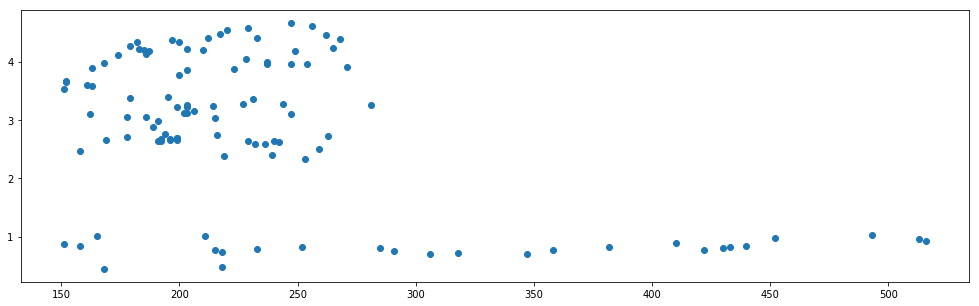

In [28]:
# Scatter plot of the features before being clustered
plt.figure(figsize=(17, 5))
plt.scatter(featuresArray[:,0], featuresArray[:,1])

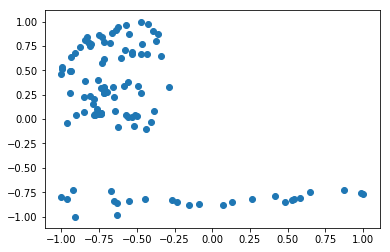

In [29]:
## SCALING THE FEATURES BEFORE BEING PLOTTED [-1, 1]
scalingComponent = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))

featuresArray = scalingComponent.fit_transform(featuresArray)

# Plot scaled features
# plt.figure(figsize=(17, 5))
plt.scatter(featuresArray[:,0], featuresArray[:,1])

In [30]:
## CLUSTERING ALGORITHMS FROM SCIKIT-LEARN

In [31]:
# K-Means Clustering Algorithm 
kmeans = sklearn.cluster.KMeans(n_clusters=2)
labelsKMeans = kmeans.fit_predict(featuresArray)
print(labelsKMeans)

[1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1]


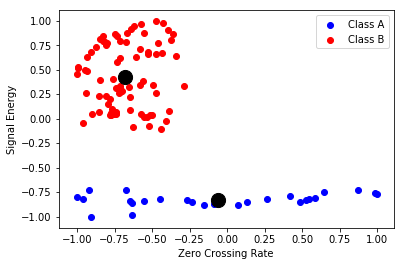

In [32]:
# Plot K-Means
plt.scatter(featuresArray[labelsKMeans==0, 0], featuresArray[labelsKMeans==0, 1], c='b')
plt.scatter(featuresArray[labelsKMeans==1, 0], featuresArray[labelsKMeans==1, 1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Signal Energy')
plt.legend(('Class A', 'Class B'))

centersKMeans = kmeans.cluster_centers_
plt.scatter(centersKMeans[:, 0], centersKMeans[:, 1], c='black', s=200)

In [33]:
# Affinity Propogation Clustering Algorithm 
affinityPropogation = sklearn.cluster.AffinityPropagation()
labelsAffinityPropogation = affinityPropogation.fit_predict(featuresArray)
print(labelsAffinityPropogation)

[7 1 6 1 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 7 1 0 1 2 1 1 1 0 1 0 1 0 3 4 6 7 8
 2 8 8 5 6 4 6 7 3 5 8 8 4 3 5 3 7 8 2 8 3 4 3 4 3 7 8 0 0 0 0 3 4 6 7 3 5
 8 8 4 3 5 6 7 3 2 8 8 4 3 5 3 7 8 2 8 3 5 3 4 3 7 3 0 7 0 0 6 6 6]


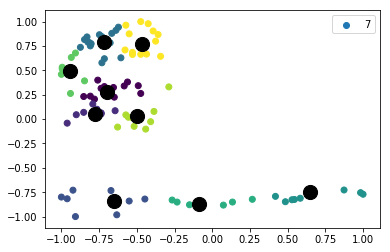

In [34]:
plt.scatter(featuresArray[:, 0], featuresArray[:,1], c=labelsAffinityPropogation, cmap='viridis')
plt.legend((labelsAffinityPropogation))

centersAffinityPropogation = affinityPropogation.cluster_centers_
plt.scatter(centersAffinityPropogation[:, 0], centersAffinityPropogation[:, 1], c='black', s=200)

In [35]:
# DBSCAN Clustering Algorithm 
dbscanModel = sklearn.cluster.DBSCAN()
labelsdbscan = dbscanModel.fit_predict(featuresArray)
print(labelsdbscan)

[0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]


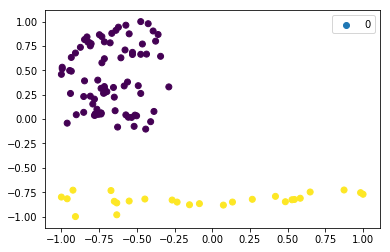

In [36]:
plt.scatter(featuresArray[:, 0], featuresArray[:,1], c=labelsdbscan, cmap='viridis')
plt.legend((labelsdbscan))